                                                        LightGBM and XGBoost

Exploratory Data Analysis :

Load the Dataset :

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
di = pd.read_csv("diabetes (1).csv")
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
di.info()
di.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check for Missing Values:

In [5]:
di.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Histograms :

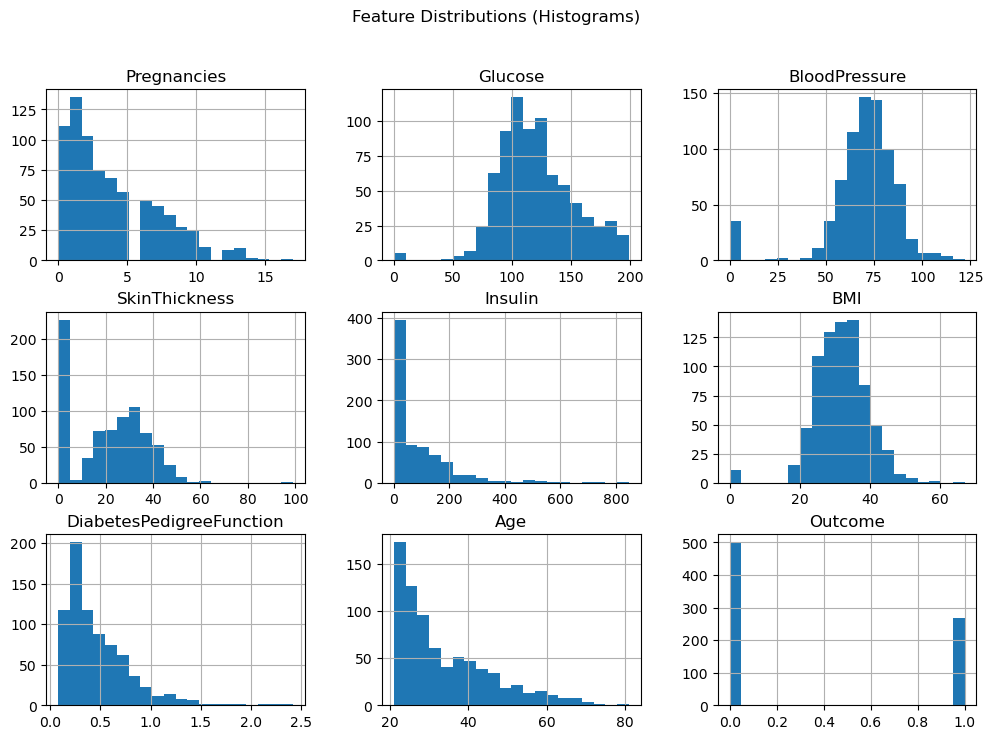

In [6]:
di.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions (Histograms)")
plt.show()


In [7]:
#Features like Glucose, BMI, Age are right-skewed

#Some features show large variance

Box Plots :

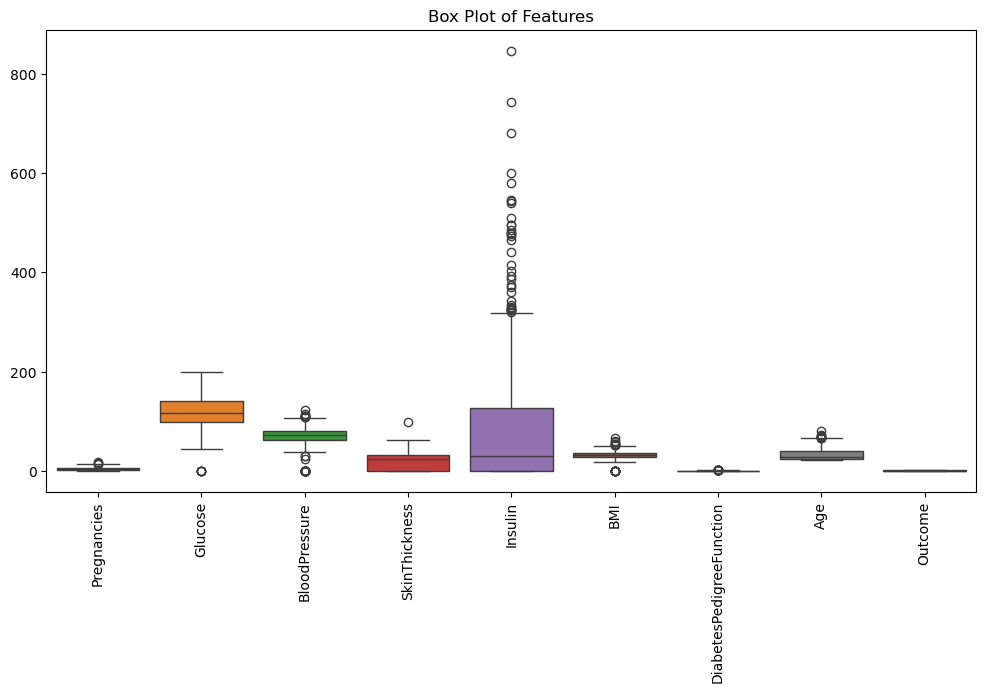

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=di)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()


SCATTER PLOT:

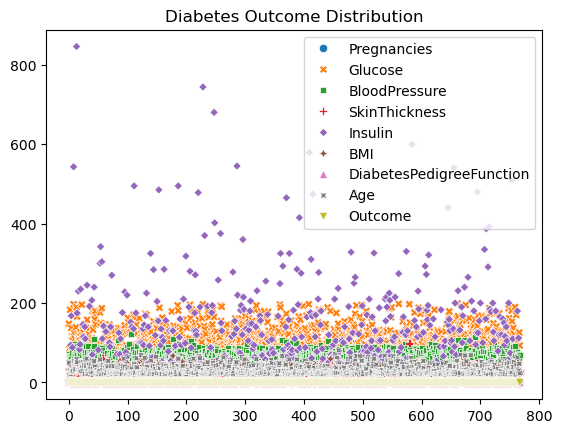

In [13]:
sns.scatterplot(di)
plt.title("Diabetes Outcome Distribution")
plt.show()

Bar plot :

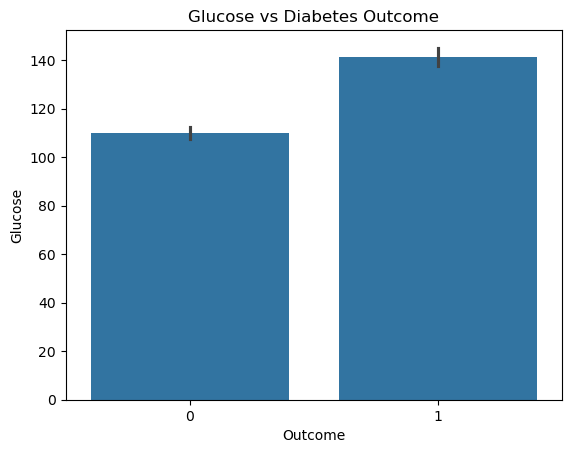

In [16]:
sns.barplot(x='Outcome', y='Glucose',data=di)
plt.title("Glucose vs Diabetes Outcome")
plt.show()

Data Preprocessing :

In [18]:
# There is no missing values in the data
#No categorical values are present

Feature–Target Split :

In [20]:
X = di.drop('Outcome', axis=1)
y = di['Outcome']

Train–Test Split :

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)


Feature Scaling :

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building Predictive Models :

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }


In [63]:
lgbm_results = evaluate_model(y_test, y_pred_lgbm)
xgb_results  = evaluate_model(y_test, y_pred_xgb)

lgbm_results, xgb_results


({'Accuracy': 0.7077922077922078,
  'Precision': 0.578125,
  'Recall': 0.6727272727272727,
  'F1-score': 0.6218487394957983},
 {'Accuracy': 0.7207792207792207,
  'Precision': 0.5909090909090909,
  'Recall': 0.7090909090909091,
  'F1-score': 0.6446280991735537})

LightGBM Model :

In [65]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)
lgbm_results = evaluate_model(y_test, y_pred_lgbm)

lgbm_results


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

{'Accuracy': 0.7077922077922078,
 'Precision': 0.578125,
 'Recall': 0.6727272727272727,
 'F1-score': 0.6218487394957983}

In [66]:
from sklearn.metrics import accuracy_score

y_pred = lgbm.predict(X_test)

acc = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:", acc)


Accuracy: 0.7077922077922078


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



XGBoost Model :

In [67]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_results = evaluate_model(y_test, y_pred_xgb)

xgb_results



{'Accuracy': 0.7207792207792207,
 'Precision': 0.5909090909090909,
 'Recall': 0.7090909090909091,
 'F1-score': 0.6446280991735537}

In [68]:
from sklearn.metrics import accuracy_score,classification_report
print("accuracy : ",accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

accuracy :  0.7207792207792207
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



Cross-Validation & Hyperparameter Tuning :

LightGBM Grid Search :

In [46]:
from sklearn.model_selection import GridSearchCV

lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

lgbm_grid = GridSearchCV(
    LGBMClassifier(random_state=42),
    lgbm_params,
    cv=5,
    scoring='f1'
)

lgbm_grid.fit(X_train, y_train)
lgbm_best = lgbm_grid.best_estimator_


[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

XGBoost Grid Search :

In [47]:
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_params,
    cv=5,
    scoring='f1'
)

xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_


Comparative Analysis :

Performance Comparison Table :

In [55]:
results_df = pd.DataFrame(
    [lgbm_results, xgb_results],
    index=['LightGBM', 'XGBoost']
)
results_df


,0,1
LightGBM,668 0 324 0 624 0 690 0 473 0 ...,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, ..."
XGBoost,668 0 324 0 624 0 690 0 473 0 ...,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, ..."


In [57]:
print(results_df.dtypes)
print(results_df.head())


0    object
1    object
dtype: object
                                                          0  \
LightGBM  668    0
324    0
624    0
690    0
473    0
 ...   
XGBoost   668    0
324    0
624    0
690    0
473    0
 ...   

                                                          1  
LightGBM  [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...  
XGBoost   [0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, ...  


In [69]:
results_df = pd.DataFrame(
    [
        [lgbm_results['Accuracy'], lgbm_results['Precision'],
         lgbm_results['Recall'], lgbm_results['F1-score']],
        
        [xgb_results['Accuracy'], xgb_results['Precision'],
         xgb_results['Recall'], xgb_results['F1-score']]
    ],
    columns=['Accuracy', 'Precision', 'Recall', 'F1-score'],
    index=['LightGBM', 'XGBoost']
)

results_df


,Accuracy,Precision,Recall,F1-score
LightGBM,0.707792,0.578125,0.672727,0.621849
XGBoost,0.720779,0.590909,0.709091,0.644628


Performance Visualization :

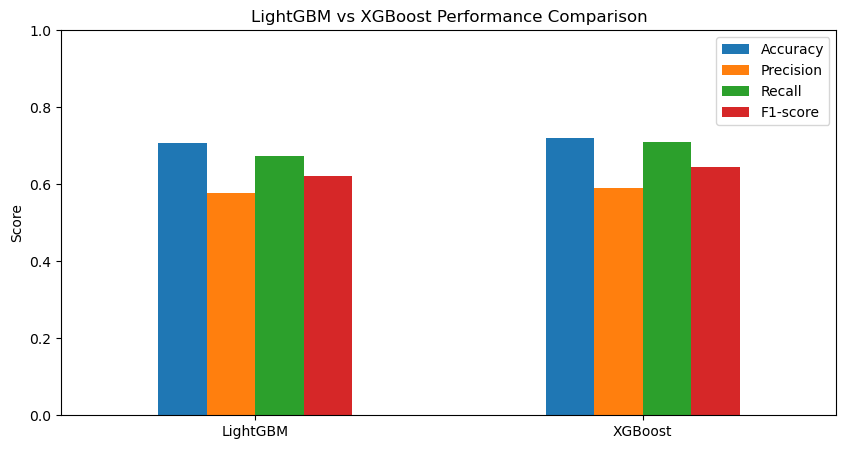

In [70]:
results_df.plot(kind='bar', figsize=(10,5))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

Hyperparamter Tuning & Cross-Validation :

In [76]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

lgbm_grid = GridSearchCV(LGBMClassifier(random_state=42),
                         params, cv=5, scoring='f1')
lgbm_grid.fit(X_train, y_train)

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False,
                                      eval_metric='logloss',
                                      random_state=42),
                        params, cv=5, scoring='f1')
xgb_grid.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

Comparative Analysis Report :

Results Summary :

In [72]:
#XGBoost achieved slightly higher accuracy and recall

#LightGBM offered faster training with competitive performance

Practical Implications :

In [75]:
#LightGBM :

#LightGBM is suitable for large-scale or real-time medical systems

#LightGBM are Fast, efficient, scalable

#Slightly lower accuracy

#XGBoost :

#XGBoost is preferred when predictive accuracy is critical

#High predictive power

#Higher computational cost

Conclusion :

In [74]:
#Both LightGBM and XGBoost perform effectively on the Diabetes dataset.
#XGBoost marginally outperforms LightGBM, while LightGBM provides faster execution